<a href="https://colab.research.google.com/github/IZ001/Stat-Machine-Learning/blob/main/Project_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task2 

Look into the provided data set by e.g. plotting the individual features. Based on your analysis,
answer the following questions:

• Do men or women dominate speaking roles in Hollywood movies?
• Has gender balance in speaking roles changed over time (i.e. years)?
• Do flms in which men do more speaking make a lot more money than flms in which women
speak more?
Write 1-2 sentences for each question and support your fndings with evidence (statistics, plots, ...).
Based on your analysis, you should evaluate how the worst-case classifer for this problem is expected
to perform. That is, the classifer that always randomly picks a class or always predicts the same
output class.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from google.colab import files
uploaded = files.upload()




Saving train.csv to train (2).csv


In [52]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']), na_values = '?').dropna().reset_index(drop=True)
# Dataset is now stored in a Pandas Dataframe

In [53]:
data.head(20)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male
5,1492,5872,1491.0,994,11,1997,4,2889,327.0,45.909091,36.500000,55.0,41.0,Male
6,1500,5322,1191.0,287,6,1980,3,2631,269.0,47.000000,24.500000,61.0,25.0,Male
7,349,6098,2692.0,2472,9,1988,2,3057,53.0,43.000000,31.000000,48.0,31.0,Male
8,857,8851,4042.0,3476,13,2001,2,3952,89.0,47.416667,28.500000,33.0,27.0,Male
9,2619,9626,1604.0,869,9,1973,6,5403,565.0,26.500000,22.000000,20.0,26.0,Male


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [55]:
#data.describe(include="all")

In [56]:
#pd.plotting.scatter_matrix(data.iloc[:, :], figsize = (10, 10))
#plt.show()

In [57]:
# Compute a correlation matrix (pairwise correlations of features).
cor = data.corr()
cor

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
Number words female,1.000000,0.675952,0.522893,0.243032,0.022951,0.031966,0.579109,0.261024,-0.105242,-0.017222,0.048125,0.028985,-0.012089
Total words,0.675952,1.000000,0.865472,0.675772,0.429698,0.008032,0.359336,0.813092,-0.058728,-0.010137,0.025384,0.003216,0.001787
Number of words lead,0.522893,0.865472,1.000000,0.889529,0.205377,0.021614,0.219205,0.524019,-0.105794,-0.013091,0.035690,0.006557,0.024508
Difference in words lead and co-lead,0.243032,0.675772,0.889529,1.000000,0.235521,0.022759,0.117375,0.418632,-0.090914,-0.027046,0.039348,0.011029,0.021931
Number of male actors,0.022951,0.429698,0.205377,0.235521,1.000000,-0.052898,0.065826,0.663466,0.104351,0.045348,0.004131,0.013452,-0.011815
Year,0.031966,0.008032,0.021614,0.022759,-0.052898,1.000000,0.133975,-0.023008,-0.285317,0.049926,0.169557,0.074238,0.146904
Number of female actors,0.579109,0.359336,0.219205,0.117375,0.065826,0.133975,1.000000,0.160032,-0.123554,-0.080817,0.089370,-0.077883,0.031431
Number words male,0.261024,0.813092,0.524019,0.418632,0.663466,-0.023008,0.160032,1.000000,0.041563,0.002069,-0.010874,-0.017600,-0.010183
Gross,-0.105242,-0.058728,-0.105794,-0.090914,0.104351,-0.285317,-0.123554,0.041563,1.000000,0.048165,-0.056540,-0.013443,-0.073116
Mean Age Male,-0.017222,-0.010137,-0.013091,-0.027046,0.045348,0.049926,-0.080817,0.002069,0.048165,1.000000,0.319374,0.489811,0.334430


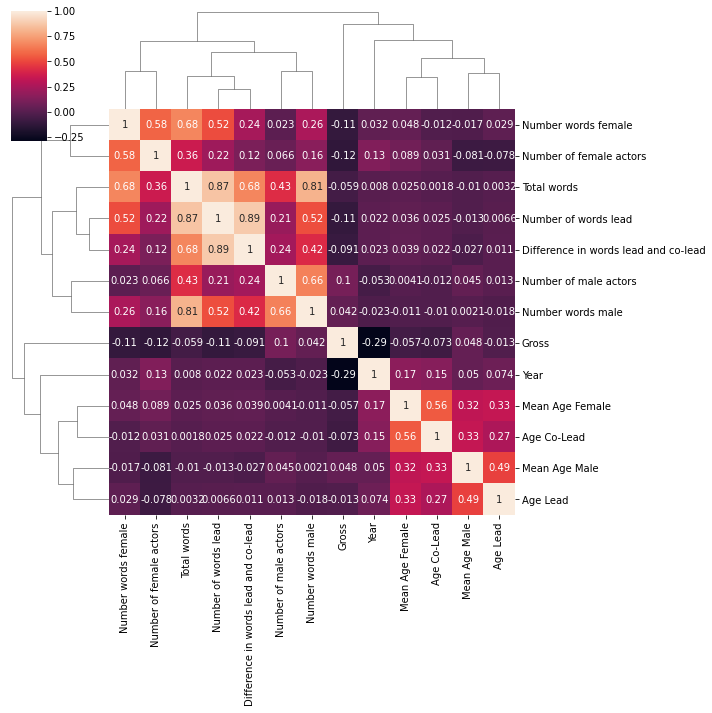

In [58]:
# One way to visualize a cor. mat. - a clustered heatmap.
# See here for more examples: https://seaborn.pydata.org/generated/seaborn.clustermap.html

# Install a package in the terminal if you don't have it. 
# E.g. on Windows use a Command Prompt. You need to have pip available.

# pip3 install seaborn
import seaborn as sns
sns.clustermap(cor, annot=cor)

In [59]:
data['Lead'] = np.where(data['Lead'] == 'Female', 1, 0)

In [60]:
data.head(20)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0
5,1492,5872,1491.0,994,11,1997,4,2889,327.0,45.909091,36.500000,55.0,41.0,0
6,1500,5322,1191.0,287,6,1980,3,2631,269.0,47.000000,24.500000,61.0,25.0,0
7,349,6098,2692.0,2472,9,1988,2,3057,53.0,43.000000,31.000000,48.0,31.0,0
8,857,8851,4042.0,3476,13,2001,2,3952,89.0,47.416667,28.500000,33.0,27.0,0
9,2619,9626,1604.0,869,9,1973,6,5403,565.0,26.500000,22.000000,20.0,26.0,0


In [61]:
# Number of male(0) and female(1) Leads.  
print(data.groupby(['Lead']).size())
female_ratio = 254/1039
print(f'There were just {female_ratio*100:.1f} % women leads during the whole period')
print(f'Given classification problem is imbalanced. The classifer, which always predicts the same output class - Male, would give the error approx. 24.4 %.')


Lead
0    785
1    254
dtype: int64
There were just 24.4 % women leads during the whole period
Given classification problem is imbalanced. The classifer, which always predicts the same output class - Male, would give the error approx. 24.4 %.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

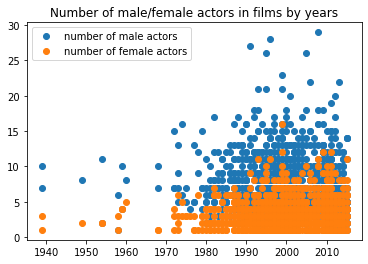

<function matplotlib.pyplot.show>

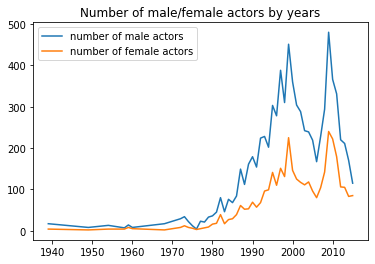

In [62]:
from numpy.core.multiarray import datetime_as_string
data_sum_by_year = data.groupby(by=["Year"], as_index=False).sum()
print(data.info())



fig, ax = plt.subplots()
ax.plot(data['Year'], data['Number of male actors'], 'o', label="number of male actors")
ax.plot(data['Year'], data['Number of female actors'], 'o', label="number of female actors")
ax.legend()
plt.title('Number of male/female actors in films by years')
plt.show()


plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number of male actors'], label="number of male actors")
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number of female actors'], label="number of female actors")
plt.title('Number of male/female actors by years')
plt.legend()
plt.show



Text(0.5, 1.0, 'Female actors ratio by year')

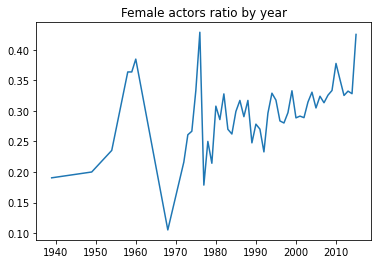

In [63]:
ratio_f = data_sum_by_year['Number of female actors']/(data_sum_by_year['Number of female actors'] + data_sum_by_year['Number of male actors'])
plt.plot(data_sum_by_year['Year'], ratio_f, label="ratio of female actors")
plt.title('Female actors ratio by year')


<function matplotlib.pyplot.show>

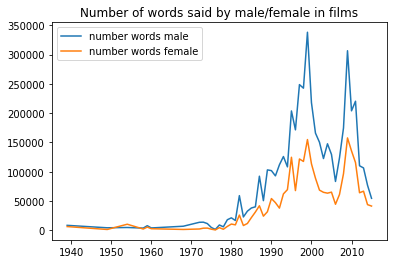

In [64]:
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number words male'], label="number words male")
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number words female'], label="number words female")
plt.title('Number of words said by male/female in films')
plt.legend()
plt.show


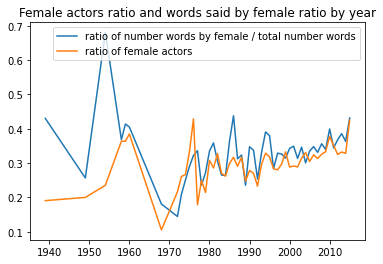

In [65]:
ratio_f2 = data_sum_by_year['Number words female']/(data_sum_by_year['Number words female'] + data_sum_by_year['Number words male'])
plt.plot(data_sum_by_year['Year'], ratio_f2, label="ratio of number words by female / total number words")


ratio_f = data_sum_by_year['Number of female actors']/(data_sum_by_year['Number of female actors'] + data_sum_by_year['Number of male actors'])
plt.plot(data_sum_by_year['Year'], ratio_f, label="ratio of female actors")
plt.title('Female actors ratio and words said by female ratio by year')
plt.legend()

In [66]:
data['number of words male with lead'] = np.where(data['Lead']==0, data['Number words male'] + data['Number of words lead'], data['Number words male'])
data['number of words female with lead'] = np.where(data['Lead']==1, data['Number words female'] + data['Number of words lead'], data['Number words female'])
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,number of words male with lead,number of words female with lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1,2631.0,3763.0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0,7256.0,1524.0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0,4021.0,155.0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0,8782.0,1073.0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0,6371.0,1317.0


Do men or women dominate speaking roles in Hollywood movies?

Has gender balance in speaking roles changed over time (i.e. years)?

Do flms in which men do more speaking make a lot more money than flms in which women
speak more?

Text(0, 0.5, 'mean income from films')

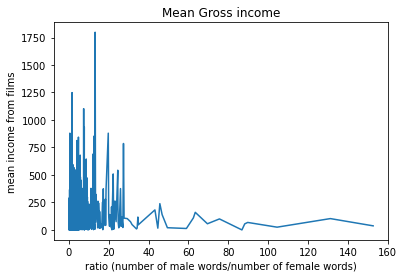

In [67]:
'''
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot( data['number of words female with lead'], data['Gross'],'o',label="female actors", color ='orange')
ax2.plot(data['number of words male with lead'], data['Gross'],'o', label="male actors")
fig.suptitle('Gross')
fig.legend()
plt.show
'''
'''

plt.plot(data['Gross'],data['number of words male with lead']/data['number of words female with lead'], 'o',label="number male words/number female words")
plt.title('Gross')

plt.show
'''
data['ratio'] = data['number of words male with lead']/data['number of words female with lead']


data_mean_by_ratio = data.groupby(by=["ratio"], as_index=False).mean()
plt.plot(data_mean_by_ratio['ratio'],data_mean_by_ratio['Gross'],label="number male words/number female words")
plt.title('Mean Gross income')
#plt.xlim([0,15])
plt.xlabel('ratio (number of male words/number of female words)')
plt.ylabel('mean income from films')
# On average the more male words in the film comparing to the number of women words, the less is gross income frome the film. 
#(The mean incomes from the films with different men/womn word ratios are presented here)
#Show with and without xlim

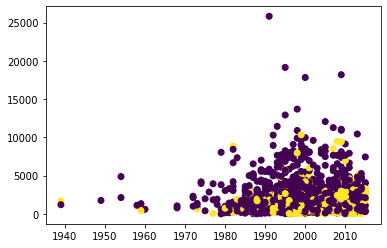

In [68]:
plt.scatter(data['Year'], data['Difference in words lead and co-lead'], c = data['Lead'])
#plt.xlim([1975,2020])



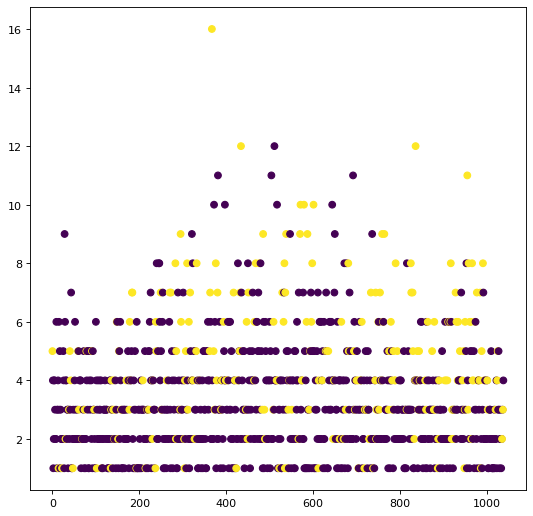

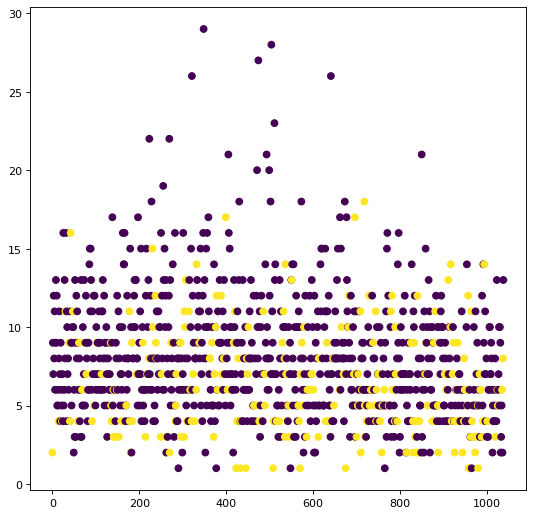

In [69]:
# number of female actors, lead

num = np.arange(0, 1039,1)

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(num, data['Number of female actors'], c = data['Lead'])

plt.show()

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(num, data['Number of male actors'], c = data['Lead'])
plt.show()

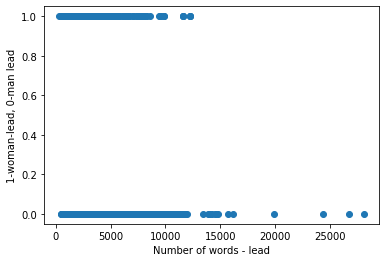

Text(0, 0.5, '1-woman-lead, 0-man lead')

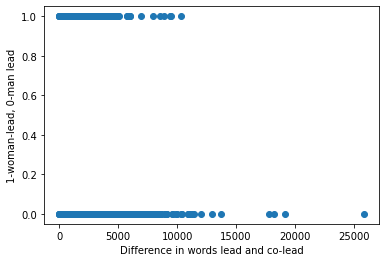

In [70]:
plt.plot(data['Number of words lead'], data['Lead'],'o')
plt.xlabel('Number of words - lead')
plt.ylabel('1-woman-lead, 0-man lead')
plt.show()

plt.plot(data['Difference in words lead and co-lead'], data['Lead'],'o')
plt.xlabel('Difference in words lead and co-lead')
plt.ylabel('1-woman-lead, 0-man lead')

In [71]:
data = data.drop(columns=['number of words male with lead', 'number of words female with lead', 'ratio'])


logistic regression

In [87]:
# Split the data randomly into a training set and a test set of approximately similar size.
data['ratio'] = data['Number of male actors']/data['Number of female actors']
data['year^3'] = data['Year']* data['Year']* data['Year']
data['Number of fem act^2'] = data['Number of female actors']*data['Number of female actors']*data['Number of female actors']


np.random.seed(1)
trainI = np.random.choice(data.shape[0], size= 500, replace=False)
trainIndex = data.index.isin(trainI)

train = data.iloc[trainIndex]
test = data.iloc[~trainIndex]

In [73]:
#input_variables = ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead', 'Number of fem act^2']

In [98]:
# with scaling

import itertools
def findsubsets(s, n):
    return list(itertools.combinations(s, n))

min_error = data.shape[0]
features_max = []
coef =0
conf_matrix =0
chosen_model =0


s = {'Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead'}
n = 10

# define model
#weights = {0:1.0, 1:2.0}
#model = LogisticRegression(solver='lbfgs', class_weight=weights)
model = skl_lm.LogisticRegression(solver ='lbfgs')

subsets = findsubsets(s, n)
for s in subsets:
  input_variables = list(s)
  #print(input_variables)
  #input_variables = ['Number of male actors', 'Number of female actors', 'Number words female','Year']

  x_train = train[input_variables]
  y_train = train['Lead']

  x_test = test[input_variables]
  y_test = test['Lead']

  import sklearn.preprocessing as skl_pre
  scaler = skl_pre.StandardScaler().fit(x_train)

  model.fit(scaler.transform(x_train), y_train )
  predict_prob = model.predict_proba(scaler.transform(x_test))
  #print(model.classes_)
  #print(predict_prob[0:5])

  prediction = np.where(predict_prob[:,0] > 0.5, 0, 1)

  #Misclassification error
  error = np.mean(prediction != y_test)

  if min_error > error:
    min_error = error
    features_max = input_variables
    chosen_model = model
    conf_matrix = pd.crosstab(prediction, y_test)
    prob = predict_prob

print(features_max)
print(min_error)
print(chosen_model.coef_)
print(chosen_model.classes_)
print(conf_matrix)
print(prob)


['Total words', 'Number of female actors', 'Number of male actors', 'Number words female', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Difference in words lead and co-lead', 'Age Lead', 'Number of words lead']
0.1391465677179963
[[-0.67867824 -0.3563017  -0.16267911  0.11547385  0.12606439 -0.03718358
   0.47923497 -1.23395237 -0.72422138  0.98540951]]
[0 1]
Lead     0   1
row_0         
0      393  63
1       12  71
[[0.91371984 0.08628016]
 [0.76945726 0.23054274]
 [0.96415186 0.03584814]
 ...
 [0.91376972 0.08623028]
 [0.61465271 0.38534729]
 [0.90290215 0.09709785]]


In [75]:
'''
# without  scaling
import itertools
def findsubsets(s, n):
    return list(itertools.combinations(s, n))

min_error = data.shape[0]
features_max = []
coef =0
conf_matrix =0
chosen_model =0

s = {'Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead'}
n = 10

model = skl_lm.LogisticRegression(solver ='lbfgs', max_iter = 5000)

subsets = findsubsets(s, n)
for s in subsets:
  input_variables = list(s)
  #print(input_variables)
  #input_variables = ['Number of male actors', 'Number of female actors', 'Number words female','Year']

  x_train = train[input_variables]
  y_train = train['Lead']

  x_test = test[input_variables]
  y_test = test['Lead'] 

  model.fit(x_train, y_train )
  predict_prob = model.predict_proba(x_test)
  #print(model.classes_)
  #print(predict_prob[0:5])

  prediction = np.where(predict_prob[:,0] > 0.5, 0, 1)


  #Misclassification error
  error = np.mean(prediction != y_test)

  if min_error > error:
    min_error = error
    features_max = input_variables
    chosen_model = model
    conf_matrix = pd.crosstab(prediction, y_test)



print(features_max)
print(max_acc)
print(chosen_model.coef_)
print(chosen_model.classes_)
print(conf_matrix)
'''

"\n# without  scaling\nimport itertools\ndef findsubsets(s, n):\n    return list(itertools.combinations(s, n))\n\nmin_error = data.shape[0]\nfeatures_max = []\ncoef =0\nconf_matrix =0\nchosen_model =0\n\ns = {'Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead'}\nn = 10\n\nmodel = skl_lm.LogisticRegression(solver ='lbfgs', max_iter = 5000)\n\nsubsets = findsubsets(s, n)\nfor s in subsets:\n  input_variables = list(s)\n  #print(input_variables)\n  #input_variables = ['Number of male actors', 'Number of female actors', 'Number words female','Year']\n\n  x_train = train[input_variables]\n  y_train = train['Lead']\n\n  x_test = test[input_variables]\n  y_test = test['Lead'] \n\n  model.fit(x_train, y_train )\n  predict_prob = model.predict_proba(x_test)\n  #print(model.classes_)\n  #print(pred

In [90]:
#print(features_max)
print(test[features_max].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 1 to 1038
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Total words                           539 non-null    int64  
 1   Number of female actors               539 non-null    int64  
 2   Number of male actors                 539 non-null    int64  
 3   Number words female                   539 non-null    int64  
 4   Gross                                 539 non-null    float64
 5   Mean Age Male                         539 non-null    float64
 6   Mean Age Female                       539 non-null    float64
 7   Difference in words lead and co-lead  539 non-null    int64  
 8   Age Lead                              539 non-null    float64
 9   Number of words lead                  539 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 46.3 KB
None


[[0.91371984 0.08628016]
 [0.76945726 0.23054274]
 [0.96415186 0.03584814]
 ...
 [0.91376972 0.08623028]
 [0.61465271 0.38534729]
 [0.90290215 0.09709785]]
[1.0, 0.9555555555555556, 0.8567901234567902, 0.8049382716049382, 0.7580246913580246, 0.7209876543209877, 0.6765432098765433, 0.6123456790123457, 0.5851851851851851, 0.5358024691358024, 0.4962962962962963, 0.4641975308641975, 0.43209876543209874, 0.4, 0.3802469135802469, 0.36049382716049383, 0.33827160493827163, 0.3135802469135803, 0.2962962962962963, 0.2716049382716049, 0.25679012345679014, 0.2419753086419753, 0.23209876543209876, 0.21975308641975308, 0.20493827160493827, 0.19506172839506172, 0.18271604938271604, 0.1728395061728395, 0.16296296296296298, 0.15555555555555556, 0.145679012345679, 0.145679012345679, 0.1382716049382716, 0.12839506172839507, 0.11851851851851852, 0.1111111111111111, 0.10123456790123457, 0.0962962962962963, 0.08888888888888889, 0.08148148148148149, 0.07407407407407407, 0.0691358024691358, 0.0617283950617283

Text(0, 0.5, 'True positive rate')

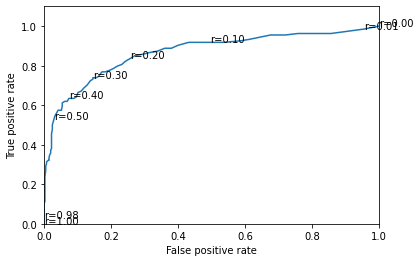

In [96]:
#ROC With scaling

# True positive rate = TP/P = TP/(TP + FN)
# False pos rate = FP /N = FP/(FP + TN)

true_positive_rate = []
false_positive_rate = []

x_test = test[features_max]
y_test = test['Lead']

positive_class = 1
negative_class = 0

P = np.sum(y_test == positive_class)
N = np.sum(y_test == negative_class)

#x_train = train[features_max]
#y_train = train['Lead']
#scaler = skl_pre.StandardScaler().fit(x_train)
#model = skl_lm.LogisticRegression(solver ='lbfgs')
#model.fit(scaler.transform(x_train), y_train )
#predict_prob = model.predict_proba(scaler.transform(x_test))

#predict_prob = chosen_model.predict_proba(scaler.transform(x_test))
#print(predict_prob)

prediction = np.empty(len(x_test), dtype ='object')

tr_val = np.linspace(0.00 , 1, num =101)
print(prob)
for k in tr_val:
  prediction = np.where(prob[:,1] > k, positive_class, negative_class)
  
  tr_pos = np.sum((prediction == y_test)&(prediction == positive_class))
  
  fal_pos = np.sum((prediction != y_test)&(prediction == positive_class))
  true_positive_rate.append(tr_pos/P)
  false_positive_rate.append(fal_pos/N)

print(false_positive_rate)
print(true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate)
for idx in [0, 1, 10, 20, 30,40, 50, 98, 100]:
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f'r={tr_val[idx]:.2f}')

plt.ylim([0, 1.1])
plt.xlim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

[[0.91371984 0.08628016]
 [0.76945726 0.23054274]
 [0.96415186 0.03584814]
 ...
 [0.91376972 0.08623028]
 [0.61465271 0.38534729]
 [0.90290215 0.09709785]]
[0 1]
[1.0, 0.9850746268656716, 0.9626865671641791, 0.9626865671641791, 0.9626865671641791, 0.9552238805970149, 0.9552238805970149, 0.9328358208955224, 0.9253731343283582, 0.917910447761194, 0.917910447761194, 0.917910447761194, 0.917910447761194, 0.9029850746268657, 0.8880597014925373, 0.8880597014925373, 0.8731343283582089, 0.8656716417910447, 0.8582089552238806, 0.8507462686567164, 0.835820895522388, 0.8208955223880597, 0.8059701492537313, 0.7985074626865671, 0.7835820895522388, 0.7761194029850746, 0.7686567164179104, 0.7686567164179104, 0.746268656716418, 0.7388059701492538, 0.7388059701492538, 0.7313432835820896, 0.7238805970149254, 0.7014925373134329, 0.6865671641791045, 0.6716417910447762, 0.664179104477612, 0.6417910447761194, 0.6343283582089553, 0.6343283582089553, 0.6343283582089553, 0.6194029850746269, 0.6194029850746269,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


Text(0, 0.5, 'Precision')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


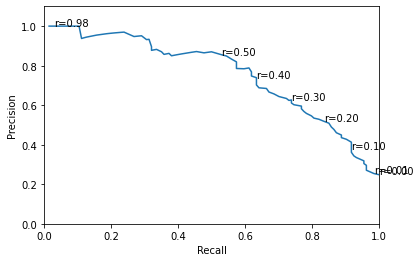

In [97]:
#The precision -recall curve With scaling

# recall = True positive rate = TP/P = TP/(TP + FN)
# precision = TP / P*    (P* = FP + TP)


recall = []
precision = []

x_test = test[features_max]
y_test = test['Lead']

positive_class = 1
negative_class = 0

P = np.sum(y_test == positive_class)
#N = np.sum(y_test == negative_class)

#x_train = train[features_max]
#y_train = train['Lead']
#scaler = skl_pre.StandardScaler().fit(x_train)
#model = skl_lm.LogisticRegression(solver ='lbfgs')
#model.fit(scaler.transform(x_train), y_train )
#predict_prob = model.predict_proba(scaler.transform(x_test))

print(prob)

prediction = np.empty(len(x_test), dtype ='object')

tr_val = np.linspace(0.00 , 1, num =101)
print(model.classes_)
for k in tr_val:
  prediction = np.where(prob[:,1] > k, positive_class, negative_class)
  P_star = np.sum(prediction == positive_class)
  tr_pos = np.sum((prediction == y_test)&(prediction == positive_class))

  recall.append(tr_pos/P)
  precision.append(tr_pos/P_star)

print(recall)
print(precision)
print()

plt.plot(recall, precision)
for idx in [0, 1, 10, 20, 30,40, 50, 98, 100]:
  plt.text(recall[idx], precision[idx], f'r={tr_val[idx]:.2f}')

plt.ylim([0, 1.1])
plt.xlim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')